<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explorando-Dados" data-toc-modified-id="Explorando-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explorando Dados</a></span><ul class="toc-item"><li><span><a href="#Valores-Transacionais" data-toc-modified-id="Valores-Transacionais-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Valores Transacionais</a></span></li><li><span><a href="#Tempo-entre-Transações" data-toc-modified-id="Tempo-entre-Transações-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tempo entre Transações</a></span></li><li><span><a href="#Valores-Iguais" data-toc-modified-id="Valores-Iguais-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Valores Iguais</a></span></li><li><span><a href="#Valores-Acima-da-Média" data-toc-modified-id="Valores-Acima-da-Média-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Valores Acima da Média</a></span></li><li><span><a href="#Normalizando-Dados" data-toc-modified-id="Normalizando-Dados-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Normalizando Dados</a></span></li></ul></li><li><span><a href="#Separando-os-Dados" data-toc-modified-id="Separando-os-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Separando os Dados</a></span></li><li><span><a href="#Under-Sampling" data-toc-modified-id="Under-Sampling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Under-Sampling</a></span><ul class="toc-item"><li><span><a href="#Separando-os-Dados-(Under-Sampling)" data-toc-modified-id="Separando-os-Dados-(Under-Sampling)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Separando os Dados (Under-Sampling)</a></span></li><li><span><a href="#Avaliando-Modelos-Candidatos" data-toc-modified-id="Avaliando-Modelos-Candidatos-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Avaliando Modelos Candidatos</a></span><ul class="toc-item"><li><span><a href="#Treino-Under-Sampling" data-toc-modified-id="Treino-Under-Sampling-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Treino Under Sampling</a></span></li><li><span><a href="#Teste-Under-Sampling" data-toc-modified-id="Teste-Under-Sampling-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Teste Under Sampling</a></span></li><li><span><a href="#Teste-Original" data-toc-modified-id="Teste-Original-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Teste Original</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Precision-x-Recall" data-toc-modified-id="Precision-x-Recall-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Precision x Recall</a></span></li></ul></li></ul></li><li><span><a href="#Regressão-Logística" data-toc-modified-id="Regressão-Logística-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regressão Logística</a></span><ul class="toc-item"><li><span><a href="#Comparação-Original-x-Undersampled" data-toc-modified-id="Comparação-Original-x-Undersampled-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Comparação Original x Undersampled</a></span></li><li><span><a href="#Precision-x-Recall" data-toc-modified-id="Precision-x-Recall-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Precision x Recall</a></span></li></ul></li></ul></div>

Este notebook é responsável por alocar o desenvolvimento e a investigação de um conjunto de dados do [Kaggle](https://www.kaggle.com/) contendo informações sobre transações de cartões de crédito para [identificação de fraude](https://www.kaggle.com/mlg-ulb/creditcardfraud).

<img src="credit_card_fraud_background.png" alt="Credit Card Fraud Background" style="width: 750px;"/>

No contexto desse problema de identificação de transações fraudulentas relacionadas ao uso de cartões de crédito, temos um conjunto de dados exemplificando transações realizadas durante dois dias de Setembro de 2013 por titulares europeus. Os dados foram coletados apresentam 492 transações fraudulentas em um total de 284.807 amostras. Isto mostra que o conjunto é altamente desbalanceado, apresentando exemplos da classe positiva (fraude) em apenas 0.172% do total de transações.

Além disso, temos um total 30 features onde 28 delas foram geradas a partir de um procedimento de PCA e, por critérios de segurança e sigilo, não foram providas informações adicionais sobre as mesmas. As duas features restantes representam, respectivamente:

* **Time:** Segundos entre cada transação e a primeira transação do dataset;
* **Amount:** Valor da Transação.

Para avaliação do modelo, é recomendado o uso de AUC ROC (Area Under the Curve - ROC), uma vez que acurácias por matriz de confusão não são boas em dados desbalanceados.

# Funções

In [127]:
import matplotlib
def plot_roc_curve(fpr, tpr, y, y_scores, auc, label=None):
    """docstring for plot_roc_curve:
    function responsible for plot the ROC curve of a model
    
    input:
        fpr: false positive rate
        tpr: true positive rate"""
    
    # Showing data
    sns.set(style='white', palette='muted', color_codes=True)
    plt.plot(fpr, tpr, linewidth=2, label=f'{label}, auc={auc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.02, 1.02, -0.02, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve', size=14)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', 
                 xy=(0.5, 0.5), xytext=(0.6, 0.4),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

In [235]:
def plot_precision_vs_recall(precisions, recalls, label=None, color='b'):
    sns.set(style='white', palette='muted', color_codes=True)
    if label=='LogisticRegression':
        plt.plot(recalls, precisions, 'r-', linewidth=2, label=label)
    else:
        plt.plot(recalls, precisions, color=color, linewidth=1, label=label)
    plt.title('Precision versus Recall', fontsize=14)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis([0, 1, 0, 1])
    plt.legend()

In [241]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.title('Precision versus Recall - Thresholds', size=13)
    plt.legend(loc='center left')
    plt.ylim([0, 1])

## Explorando Dados

In [3]:
# Importando biblioteca
import pandas as pd

# Lendo dados
df = pd.read_csv('creditcard.csv')

# Verificando
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Verificando quantidades
df.shape

(284807, 31)

In [5]:
print(f'O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset contém 284807 linhas e 31 colunas.


In [6]:
# Dados nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Com o objetivo de familiarização com o dataset, vamos aplicar, nas próximas sessões, algumas investigações exploratórias relacionadas as duas features presentes no modelo que não passaram pelo procedimento de redução de dimensionalidade: `Time` e `Amount`. Os assuntos abordados serão relacionados a:

* **Valores Transacionais:**
    - Existe alguma relação entre transações com valores nulos e fraudes?
    - Valor médio em transações normais e fraudulentas;
    - Distribuição de valores por tipo de transação;
    
    
* **Tempo entre Transações:**
    - Mais de uma transação pode ter sido registrada no mesmo instante de tempo?
    - Existe alguma relação entre transações registrada no mesmo instante e fraude?
    - Distribuição de tempo entre transações por classe.
    
    
* **Valores Iguais:**
    - Existe alguma relação entre valores iguais e fraude?
    
    
* **Valores Acima da Média:**
    - Existe alguma relação entre valores elevados e fraude?

### Valores Transacionais

In [7]:
# Estatísticas sobre o Valor
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

O espectro de valores vai desde transações com $\$0,00$ até transações de $\$25.691,16$. O valor médio é de $\$88,34$

Apenas por curiosidade, vamos investigar quantas transações possuem valor nulo ($\$0,00$)

In [8]:
# Transações zeradas
zero_amount = df[df['Amount']==0]
zero_amount.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0


In [9]:
# Quantas transações com valor zerado?
zero_amount.shape[0]

1825

Algum insight pode ser tirado de transações fraudulentas sem nenhum valor envolvido?

In [10]:
# Transações zeradas e fraudulentas
zero_amount_fraud = zero_amount[zero_amount['Class']==1]
zero_amount_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.0,1
23308,32686.0,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.0,1
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.0,1
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.0,1


In [11]:
# Quantas?
zero_amount_fraud.shape[0]

27

Interessante pensar em transações com valores zerados. Mais interessante ainda é pensar em transações zeradas **e** fraudulentas. Qual seria a respectiva porcentagem do total?

In [12]:
# Total de transações fraudulentas
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
# Porcentagem de transações zeradas e fraudulentas
total_fraud = df['Class'].value_counts()[1]
total_zero_amount_fraud = zero_amount_fraud.shape[0]

perc_zero_amount_fraud = total_zero_amount_fraud / total_fraud
print(f'Do total de fraudes, temos {100*perc_zero_amount_fraud:.2f}% com valor \
$0,00 nas transações.')

Do total de fraudes, temos 5.49% com valor $0,00 nas transações.


Um número considerável? Precisamos entender, em primeiro lugar, o que seriam transações com valores nulos.

Vamos tentar retirar algum insight de transações de classes positiva (fraudulentas) e negativas (normal).

In [14]:
# Indexando dataframe
fraud_transactions = df.query('Class == 1')
normal_transactions = df.query('Class == 0')

In [15]:
# O número de amostras bate?
print(f'Transações fraudulentas: {fraud_transactions.shape[0]}')
print(f'Transações normais: {normal_transactions.shape[0]}')

Transações fraudulentas: 492
Transações normais: 284315


In [16]:
# Estatísticas sobre valores de transações fraudulentas
fraud_transactions['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# Estatística sobre valores de transações normais
normal_transactions['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Numericamente, é possível afirmar que a média de valores de transações consideradas normais, é de $\$88.29$, enquanto o valor médio de transações fraudulentas é de $\$122.21$

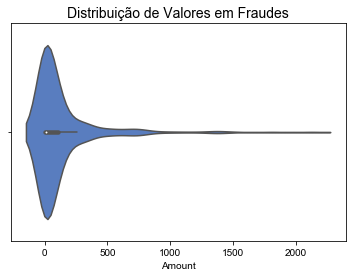

In [18]:
# Visualizando graficamente
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Preparando gráfico
fig, ax = plt.subplots()
sns.set(style='darkgrid', palette='muted')
ax = sns.violinplot(x='Amount', data=fraud_transactions)
ax.set_title('Distribuição de Valores em Fraudes', size=14)
plt.show()

Os valores não são balanceados, ou seja, temos uma concentração de transações entre 0 e 250, mas também temos valores elevados de transações, dificultando assim a visualização gráfica. Vamos ver a distribuição de valores de transações fraudulentas.

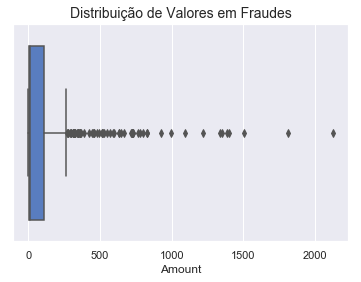

In [19]:
# Boxplot
fig, ax = plt.subplots()
ax = sns.boxplot(fraud_transactions['Amount'])
ax.set_title('Distribuição de Valores em Fraudes', size=14)
plt.show()

Realmente fica difícil de visualizar um comportamento relacionado ao valor das transações graficamente.

In [295]:
help(format_spines)

Help on function format_spines in module __main__:

format_spines(ax, right_border=True)
    docstring for format_spines:
    função responsável por retirar bordas do gráfico e personalizar cor:
    input:
        ax: eixo do gráfico



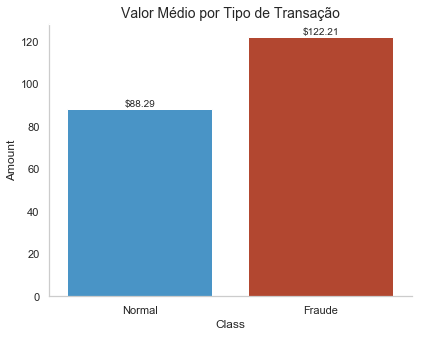

In [20]:
# Visualizando valor médio
def format_spines(ax, right_border=True):
    """docstring for format_spines:
    função responsável por retirar bordas do gráfico e personalizar cor:
    input:
        ax: eixo do gráfico"""
    
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
custom_colors = ["#3498db", "#C8391A"]
fig, ax = plt.subplots()
ax = sns.barplot(x='Class', y='Amount', data=df,
                 palette=custom_colors, ci=None)
format_spines(ax, right_border=False)
ax.set_title('Valor Médio por Tipo de Transação', size=14)

ncount = len(df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('${:.2f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.tight_layout()
plt.subplots_adjust(top=1.1)
ax.set_xticklabels(['Normal', 'Fraude'])
plt.show()

### Tempo entre Transações

Vamos investigar se há um padrão de "tempo" em transações fraudulentas respondendo a pergunta: _Transações fraudulentas ocorrem de tempos em tempos? Se sim, aproximadamente qual o padrão temporal identificado?_

In [21]:
# Transações fraudulentas
fraud_transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [312]:
# Índices de transações fraudulentas no dataset
fraud_idx = list(fraud_transactions.index)
print(fraud_idx, end=',')

[541, 623, 4920, 6108, 6329, 6331, 6334, 6336, 6338, 6427, 6446, 6472, 6529, 6609, 6641, 6717, 6719, 6734, 6774, 6820, 6870, 6882, 6899, 6903, 6971, 8296, 8312, 8335, 8615, 8617, 8842, 8845, 8972, 9035, 9179, 9252, 9487, 9509, 10204, 10484, 10497, 10498, 10568, 10630, 10690, 10801, 10891, 10897, 11343, 11710, 11841, 11880, 12070, 12108, 12261, 12369, 14104, 14170, 14197, 14211, 14338, 15166, 15204, 15225, 15451, 15476, 15506, 15539, 15566, 15736, 15751, 15781, 15810, 16415, 16780, 16863, 17317, 17366, 17407, 17453, 17480, 18466, 18472, 18773, 18809, 20198, 23308, 23422, 26802, 27362, 27627, 27738, 27749, 29687, 30100, 30314, 30384, 30398, 30442, 30473, 30496, 31002, 33276, 39183, 40085, 40525, 41395, 41569, 41943, 42007, 42009, 42473, 42528, 42549, 42590, 42609, 42635, 42674, 42696, 42700, 42741, 42756, 42769, 42784, 42856, 42887, 42936, 42945, 42958, 43061, 43160, 43204, 43428, 43624, 43681, 43773, 44001, 44091, 44223, 44270, 44556, 45203, 45732, 46909, 46918, 46998, 47802, 48094, 502

In [313]:
# Calculando intervalo entre fraudes
time_fraud = []
for idx in range(len(fraud_idx)):
    if fraud_idx.index(fraud_idx[idx]) == 0:
        pass
    else:
        time_fraud.append(fraud_idx[idx] - fraud_idx[idx-1])

In [314]:
# Verificando 
print(time_fraud, end=',')

[82, 4297, 1188, 221, 2, 3, 2, 2, 89, 19, 26, 57, 80, 32, 76, 2, 15, 40, 46, 50, 12, 17, 4, 68, 1325, 16, 23, 280, 2, 225, 3, 127, 63, 144, 73, 235, 22, 695, 280, 13, 1, 70, 62, 60, 111, 90, 6, 446, 367, 131, 39, 190, 38, 153, 108, 1735, 66, 27, 14, 127, 828, 38, 21, 226, 25, 30, 33, 27, 170, 15, 30, 29, 605, 365, 83, 454, 49, 41, 46, 27, 986, 6, 301, 36, 1389, 3110, 114, 3380, 560, 265, 111, 11, 1938, 413, 214, 70, 14, 44, 31, 23, 506, 2274, 5907, 902, 440, 870, 174, 374, 64, 2, 464, 55, 21, 41, 19, 26, 39, 22, 4, 41, 15, 13, 15, 72, 31, 49, 9, 13, 103, 99, 44, 224, 196, 57, 92, 228, 90, 132, 47, 286, 647, 529, 1177, 9, 80, 804, 292, 2117, 326, 1929, 55, 63, 1007, 203, 1607, 1302, 545, 222, 145, 807, 339, 778, 2248, 1634, 213, 695, 82, 49, 3607, 253, 202, 111, 865, 482, 161, 448, 2168, 1027, 73, 639, 11, 287, 717, 1044, 54, 320, 170, 249, 39, 295, 1843, 11, 299, 39, 9, 877, 426, 423, 791, 653, 244, 120, 1126, 1612, 1199, 904, 49, 569, 21, 293, 2481, 1106, 647, 62, 302, 430, 1316, 63, 

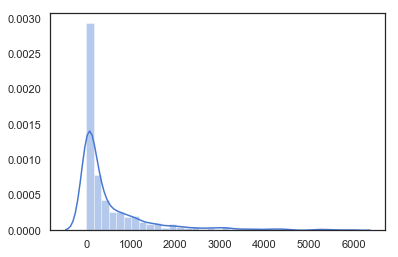

In [315]:
ax = sns.distplot(time_fraud)

Pelos números obtidos, é possível identificar transações fraudulentas que ocorreram em um curto espaço de tempo, como por exemplo, de 2 ou até mesmo 1 segundo de diferença.

**Ideia:** 

Isto pode se tornar uma feature para um outro tipo de problema relacionado a fraude: seria possível prever a maior probabilidade de intervalo de tempo onde uma transação fraudulenta pode ocorrer?

In [25]:
# Média
time_fraud_series = pd.Series(time_fraud)
time_fraud_series.describe()

count     491.000000
mean      572.572301
std       940.142245
min         1.000000
25%        34.000000
50%       174.000000
75%       711.000000
max      5907.000000
dtype: float64

Em média, transações fraudulentas ocorrem a cada 572,57 segundos. Entretanto, a confiança desta afirmação é lesada pelo alto desvio padrão contido nessa sequência de tempo a cada transação fraudulenta.

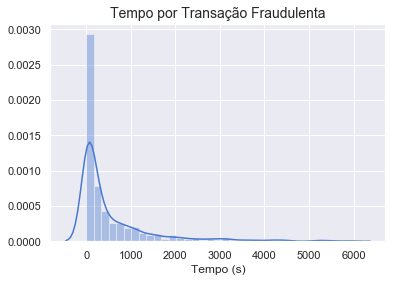

In [26]:
# Distribuição
fig, ax = plt.subplots()
ax = sns.distplot(time_fraud_series)
ax.set_title('Tempo por Transação Fraudulenta', size=14)
ax.set_xlabel('Tempo (s)')
plt.show()

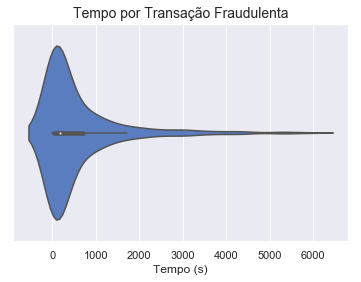

In [27]:
# Violin plot
fig, ax = plt.subplots()
ax = sns.violinplot(time_fraud_series)
ax.set_title('Tempo por Transação Fraudulenta', size=14)
ax.set_xlabel('Tempo (s)')
plt.show()

In [28]:
# Qual a moda?
time_fraud_series.mode()[0]

1

In [29]:
# Comunicando
print(f'Intervalo mais comum entre transações fraudulentas: \n\
{time_fraud_series.mode()[0]} segundo(s)')

Intervalo mais comum entre transações fraudulentas: 
1 segundo(s)


In [30]:
# Procurando mais insights
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Será que, de alguma forma, transações fraudulentas são realizadas no mesmo segundo que transações normais? Hackers mal intencionados poderiam ter conhecimento sobre transações e, para dificultar a identificação das fraudes, estas seriam realizadas no mesmo instante que outras transações.

In [31]:
# Calculando intervalo entre fraudes
time_transactions_idx = list(df.index)
equal_time = []
for idx in range(len(df['Time'])):
    if idx == 0:
        pass
    elif df['Time'][idx] == df['Time'][idx-1]:
        equal_time.append(idx)

In [32]:
# Verificando
print(equal_time, end=',')

[1, 3, 5, 8, 11, 12, 15, 16, 23, 25, 27, 28, 29, 33, 34, 35, 37, 39, 41, 43, 45, 46, 47, 49, 50, 52, 53, 57, 60, 61, 62, 64, 66, 67, 68, 70, 71, 74, 76, 77, 79, 82, 86, 88, 90, 92, 95, 96, 98, 100, 101, 103, 104, 105, 109, 110, 111, 113, 114, 115, 118, 120, 121, 123, 124, 125, 128, 131, 133, 134, 136, 137, 139, 143, 145, 147, 148, 150, 152, 153, 154, 157, 159, 162, 163, 164, 166, 170, 172, 175, 178, 181, 183, 186, 188, 189, 191, 192, 195, 197, 200, 203, 204, 210, 211, 212, 213, 216, 220, 221, 222, 223, 225, 229, 231, 233, 235, 236, 238, 240, 243, 244, 246, 247, 251, 253, 256, 258, 260, 262, 267, 268, 269, 270, 274, 275, 277, 279, 280, 282, 284, 285, 288, 289, 291, 292, 293, 294, 297, 302, 303, 305, 307, 309, 310, 311, 313, 315, 319, 323, 325, 329, 330, 331, 335, 336, 342, 343, 346, 350, 351, 352, 354, 355, 359, 360, 361, 363, 364, 366, 369, 372, 375, 376, 381, 384, 385, 386, 388, 390, 391, 392, 393, 397, 398, 401, 402, 403, 405, 408, 410, 411, 412, 414, 417, 419, 423, 426, 428, 429, 43

O laço for demorou a ser executado. Estudar nova implementação com `list comprehension`.

De acordo com o resultado obtido, vamos verificar alguns exemplos de transações ocorridas no mesmo tempo para que possamos validar a implementação acima. Vamos visualizar os exemplos de índices 1, 3, 5, 8, 11 e 12, 15 e 16 e 23, com os índices anteriores.

In [33]:
# Visualizando transações que ocorreram ao mesmo tempo
idx_equal_test = [1, 3, 5, 8, 11, 12, 15, 16, 23]
idx_equal_prev = [x-1 for x in idx_equal_test]
idx_equal = np.unique(np.r_[idx_equal_prev + idx_equal_test])

df.iloc[idx_equal, np.r_[(0, -2, -1)]]

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
5,2.0,3.67,0
7,7.0,40.80,0
8,7.0,93.20,0
10,10.0,7.80,0
11,10.0,9.99,0


A implementação funcionou! Agora temos, através do objeto `equal_time` todas as transações ocorridas ao mesmo tempo. Vamos verificar qual a porcentagem de fraude delas.

In [34]:
# Visualizando transações que ocorreram ao mesmo tempo
equal_time_prev = [x-1 for x in equal_time]
idx_equal = np.unique(np.r_[equal_time_prev + equal_time])

equal_time_transactions = df.iloc[idx_equal, :]
equal_time_transactions.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [35]:
# Verificando quantidade
equal_time_transactions.shape[0]

239644

In [36]:
# Comparando com o original
df.shape

(284807, 31)

A conclusão é que muitas transações foram realizadas ao mesmo tempo. Se analisarmos somente da segunda transação ao mesmo tempo pra frente, talvez possamos tirar insights mais relevantes.

In [37]:
# Verificando
equal_time_second_transactions = df.iloc[equal_time, :]
equal_time_second_transactions.shape[0]

160215

In [38]:
# Dentro dessas, quantas são fraudes?
equal_time_second_transactions.query('Class==1').shape[0]

248

Nada que nos permita extrair relevantes informações.

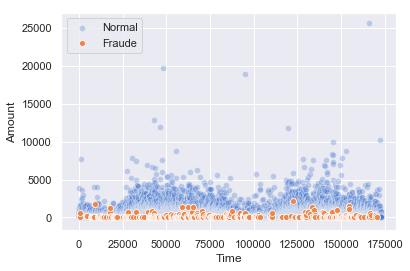

In [39]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x='Time', y='Amount', data=df, alpha=.3, label='Normal')
ax = sns.scatterplot(x='Time', y='Amount', data=fraud_transactions, label='Fraude')
plt.legend()
plt.show()

### Valores Iguais

Transações com valores repetidos podem estar relacionadas com fraude? Com que frequência ocorrem?

In [40]:
# Ordenando dataframe por valor transacional
ordered_value = df.sort_values('Amount')
ordered_value.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15816,27255.0,1.248804,0.047208,0.423388,-0.139515,-0.592217,-0.980654,-0.042416,-0.123044,-0.088962,...,-0.166215,-0.501598,0.124995,0.594070,0.119626,0.816501,-0.089465,-0.004055,0.0,0
77470,57062.0,-1.188664,-0.612034,2.422204,-0.812786,0.318493,-0.671637,-0.432053,0.068237,0.684183,...,0.002347,0.164823,-0.096075,0.393014,-0.608295,0.745069,-0.230070,-0.018679,0.0,0
190885,129019.0,1.868263,0.273764,-0.288023,3.835852,0.268329,0.817380,-0.287993,0.203258,-0.504927,...,0.115927,0.610472,0.024259,-0.454322,0.117948,0.144547,-0.002638,-0.061637,0.0,0
87335,61640.0,-0.848470,1.426562,2.137094,2.852036,-0.366945,1.158146,-0.416142,0.812490,-0.688381,...,-0.210710,-0.369433,-0.271748,-0.571453,0.232587,0.273226,0.248532,0.088226,0.0,0
174481,121931.0,-1.184195,0.804518,2.240498,2.853175,1.038068,0.171728,0.457665,0.290123,-1.100519,...,0.110209,0.254591,-0.475647,-0.046345,0.888929,0.225662,-0.007746,0.057191,0.0,0
261840,160203.0,2.037530,-0.068534,-1.566791,0.125108,0.301918,-0.714361,0.170216,-0.085433,0.395596,...,-0.102592,-0.344140,0.281242,0.634925,-0.084306,-0.536669,-0.044266,-0.062104,0.0,0
60681,49446.0,1.051131,0.078365,1.371753,2.662810,-0.347892,1.390227,-0.742831,0.466555,0.100451,...,0.087428,0.652637,-0.161363,-0.230979,0.584717,0.242936,0.066086,0.011721,0.0,0
115131,73758.0,-0.956441,1.002075,0.870574,-1.475914,0.029941,-0.326977,0.266672,0.654644,-0.463467,...,-0.091851,-0.389564,-0.016400,-0.296194,-0.389571,0.693608,0.128017,0.092436,0.0,0
190894,129024.0,1.895858,0.300037,-0.177958,4.044251,-0.037868,0.200553,-0.202884,0.041879,-0.178301,...,0.073807,0.488633,0.078707,-0.028500,0.098306,0.137917,-0.005373,-0.048734,0.0,0
115136,73760.0,-0.907995,0.758230,1.819020,-0.545179,-0.795851,-0.063335,-0.258224,0.642900,0.517573,...,0.183969,0.939407,-0.090921,0.541961,-0.398305,1.008075,0.244808,0.148367,0.0,0


In [41]:
# Indexando dataframe apenas com amostras de valores duplicados
bool_mask = ordered_value['Amount'].duplicated(keep=False)
duplicated_amount = ordered_value[bool_mask]
duplicated_amount.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15816,27255.0,1.248804,0.047208,0.423388,-0.139515,-0.592217,-0.980654,-0.042416,-0.123044,-0.088962,...,-0.166215,-0.501598,0.124995,0.594070,0.119626,0.816501,-0.089465,-0.004055,0.0,0
77470,57062.0,-1.188664,-0.612034,2.422204,-0.812786,0.318493,-0.671637,-0.432053,0.068237,0.684183,...,0.002347,0.164823,-0.096075,0.393014,-0.608295,0.745069,-0.230070,-0.018679,0.0,0
190885,129019.0,1.868263,0.273764,-0.288023,3.835852,0.268329,0.817380,-0.287993,0.203258,-0.504927,...,0.115927,0.610472,0.024259,-0.454322,0.117948,0.144547,-0.002638,-0.061637,0.0,0
87335,61640.0,-0.848470,1.426562,2.137094,2.852036,-0.366945,1.158146,-0.416142,0.812490,-0.688381,...,-0.210710,-0.369433,-0.271748,-0.571453,0.232587,0.273226,0.248532,0.088226,0.0,0
174481,121931.0,-1.184195,0.804518,2.240498,2.853175,1.038068,0.171728,0.457665,0.290123,-1.100519,...,0.110209,0.254591,-0.475647,-0.046345,0.888929,0.225662,-0.007746,0.057191,0.0,0


In [42]:
# Quantas amostras com valores duplicados?
duplicated_amount.shape[0]

268843

In [43]:
# Quantas são fraudes?
duplicated_amount.query('Class==1').shape[0]

431

Também não é possivel tirar insights significantes dessa análise, dado que transações com valores duplicados não são tão incomuns, especialmente quando estamos falando de baixos valores.

### Valores Acima da Média

In [44]:
# Retirando transações sem valor

# Analisando valores que superam a média
mean_amount = df['Amount'].mean()
high_amount = df.query('Amount > @mean_amount')
high_amount.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
12,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0


In [45]:
# Qual a média?
mean_amount

88.34961925087359

In [46]:
# Quantas transações acima da média?
len(high_amount)

64407

In [47]:
# Quantas delas são fraudes?
high_amount.query('Class==1').shape[0] / len(high_amount)

0.0025463070784231528

A proporção do dataset original se mantém.

**Conclusões:**
* Não foi possível vincular nenhuma das suposições mencionadas no início dessa sessão com transações fraudulentas. O único destaque de toda essa investigação é a conclusão de que, no geral, fraudes possuem um valor médio maior do que transações normais. Mesmo assim, essa conclusão encontram-se, de certa forma, enviesada, dado que a porcentagem de fraudes presentes no dataset representa apenas 0.17% do total, tornando esta afirmação pouco representativa dentro do contexto deste problema. 

### Normalizando Dados

Vamos aplicar o procedimento de normalização dos dados e, como nenhum insight pôde ser retirado da coluna `Time`, visto que seu significado não deve influenciar no resultado de modelos treinados, vamos elimina-la do dataset.

In [48]:
# Normalizando dados
from sklearn.preprocessing import StandardScaler

# Normalizando e dropando coluna Time
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop('Time', axis=1, inplace=True)

# Verificando
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Separando os Dados

Antes de mais nada, vamos aplicar a separação dos dados para que possamos avaliar os modelos treinados de forma mais assertiva futuramente. Tendo em mente que este é um problema altamente desbalanceado, sabemos que será necessário algum procedimento de balanceamento, como `undersampling` ou `oversampling` para avaliação das ações tomadas. De toda forma, separar os dados originais é um processo válido que auxiliará na avaliação do modelo.

In [49]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

# Indexando dados
X = df.iloc[:, :-1]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Verificando
print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de y_train: {y_train.shape}')
print(f'Dimensões de X_test: {X_test.shape}')
print(f'Dimensões de y_test: {y_test.shape}')

Dimensões de X_train: (227845, 29)
Dimensões de y_train: (227845,)
Dimensões de X_test: (56962, 29)
Dimensões de y_test: (56962,)


In [50]:
# Verificando balanceamento de classes treino
positive_class_train = sum(y_train == 1)
balance_class_train = positive_class_train / len(y_train)
print(f'Porcentagem de fraudes nos dados de treino: {100*balance_class_train:.4f}%')

# Verificando balanceamento de classes teste
positive_class_test = sum(y_test == 1)
balance_class_test = positive_class_test / len(y_test)
print(f'Porcentagem de fraudes nos dados de test: {100*balance_class_test:.4f}%')

Porcentagem de fraudes nos dados de treino: 0.1699%
Porcentagem de fraudes nos dados de test: 0.1843%


A separação ocorreu de forma balanceada, entretando as classes em si não estão balanceadas. Temos apenas 0.17% de fraudes nos dados de treino. Isto significa que 99.83% das amostras referem-se a transações normais.

**Se criarmos um modelo sem inteligência que considera todas as transações como normais, teríamos 99,83% de acurácia!** Obviamente ao preço de classificar erroneamente todas as transações fraudulentas.

Por esse motivo não podemos simplesmente considerar a `acurácia` como medida de performance do nosso modelo, mas também métricas como `confusion matrix`, `precision`, `recall`, `f1_score`, `ROC curve` e `AUC score`. Para termos sucesso em nossa avaliação, precisamos aplicar um procedimento de `balanceamento` nos dados. Em um primeiro momento, vamos aplicar o procedimenteo de `under-sampling` que, por sua vez, refere-se a equalização entre as classes positiva e negativa a partir da eliminação, de forma probabilística, de exemplos da classe negativa.

## Under-Sampling

A técnica de under-sampling simplesmente visa balancear nossos dados e promover um valor igualitário (50-50) entre as classes positiva e negativa. Alguns pontos a serem considerados:

* Número de amostras da **classe positiva**;
* Maneira correta de aplicar o **shuffle** nos dados;
* Considerar **perda de informação** ao deletar instâncias do dataset original.

Um ponto importante deste procedimento de under sampling é que o mesmo está sendo realizado **antes** da aplicação do `cross validation`, ou seja, é provável que alguns dos nossos dados utilizados para treinar o modelo também estejam nos dados de teste, enviesando assim o modelo. O ideal seria aplicar o procedimento under sampling durante a validação cruzada, o que será proposto futuramente.

In [51]:
# Já temos os dataframes indexados da análise exploratória
total_fraud = len(fraud_transactions)
total_normal = len(normal_transactions)
print(f'Quantidade de fraudes: {total_fraud}')
print(f'Transações normais: {total_normal}')

Quantidade de fraudes: 492
Transações normais: 284315


In [52]:
# Embaralhando e balanceando dataset
shuffle_index = np.random.choice(normal_transactions.index, total_fraud, replace=False)
print(f'Quantidade de índices embaralhados: {len(shuffle_index)}')

# Unindo índices e criando novo dataframe
undersampled_index = np.concatenate([shuffle_index, fraud_transactions.index])
df_undersampled = df.iloc[undersampled_index, :]
print(f'Total de linhas do novo dataframe balanceado: {len(undersampled_index)}')

# Verificando cabeçalho
df_undersampled.head()

Quantidade de índices embaralhados: 492
Total de linhas do novo dataframe balanceado: 984


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152547,-0.936830,-0.239115,1.934028,-0.672160,0.804937,0.369129,-0.634482,0.396422,1.543985,-1.028432,...,0.010186,0.030638,-0.019125,0.148927,-0.378821,0.445089,0.032700,0.134650,-0.289460,0
80170,-0.539854,0.637582,1.464793,-0.465250,1.046668,1.680978,0.446910,0.507923,-0.432208,-0.113137,...,-0.131356,-0.061578,0.035303,-1.383276,-0.534272,0.175970,0.163262,-0.130799,-0.313888,0
71284,-0.545620,0.781026,1.295501,0.803015,0.682473,0.190841,0.599254,-0.089885,-0.511960,0.455107,...,0.167663,0.602738,-0.196246,-0.313018,-0.307478,-0.282269,-0.266199,-0.054154,-0.347232,0
235472,2.014308,-0.062864,-1.201616,0.323124,0.217130,-0.136401,-0.330436,-0.047568,0.822355,-0.515507,...,-0.350278,-0.914978,0.337966,-0.004607,-0.478584,0.120055,-0.018280,-0.009938,-0.245641,0
135160,1.397371,-0.937008,0.333907,-1.895235,-1.517150,-1.152684,-0.641375,-0.148439,0.792018,-0.363209,...,-0.653011,-1.209221,0.118197,0.352523,0.324173,-0.185220,0.035358,0.018907,-0.313728,0


In [53]:
# Verificando balanceamento entre classes
df_undersampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [299]:
def count_class(df, title, colors=custom_colors):
    fig, ax = plt.subplots()
    ax = sns.countplot(x='Class', data=df, palette=custom_colors)
    format_spines(ax, right_border=False)
    ax.set_title(title, size=14)

    ncount = len(df)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    plt.tight_layout()
    plt.subplots_adjust(top=1.1)
    ax.set_xticklabels(['Normal', 'Fraude'])
    plt.show()

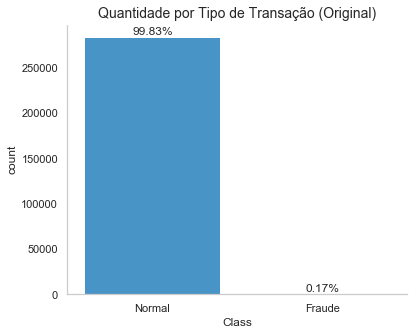

In [300]:
custom_colors = ["#3498db", "#C8391A"]
count_class(df, 'Quantidade por Tipo de Transação (Original)', custom_colors)

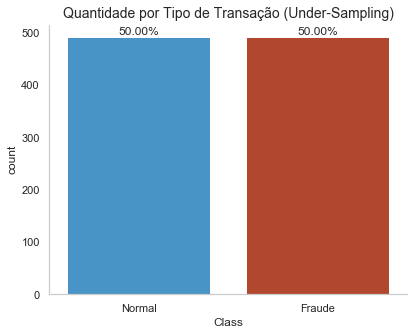

In [301]:
count_class(df_undersampled, 'Quantidade por Tipo de Transação (Under-Sampling)', custom_colors)

Agora que temos um conjunto balanceado, vamos aplicar um pipeline de treinamento com alguns classificadores para eleger um algoritmo específico para se trabalhar e aprimorar. Para isso, vamos:

* Separar os dados em **treino** e **teste**;
* Eleger *5 ou 6* classificadores;
* Avaliar `acurácia`, `precision`, `recall`, `f1_score`, `matriz de confusão`, `ROC curve`
* Avaliar métricas nos dados de **treino undersampled**;
* Avaliar métricas nos dados de **teste undersamples**;
* Avaliar métricas nos dados de **teste original**.

### Separando os Dados (Under-Sampling)

In [55]:
# Separando os dados
X_under = df_undersampled.iloc[:, :-1]
y_under = df_undersampled['Class']
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under,
                                                                           test_size=.2)

# Verificando
print(f'Dimensões de X_train_under: {X_train_under.shape}')
print(f'Dimensões de y_train_under: {y_train_under.shape}')
print(f'Dimensões de X_test_under: {X_test_under.shape}')
print(f'Dimensões de y_test_under: {y_test_under.shape}')

Dimensões de X_train_under: (787, 29)
Dimensões de y_train_under: (787,)
Dimensões de X_test_under: (197, 29)
Dimensões de y_test_under: (197,)


In [56]:
# Verificando balanceamento de classes treino
positive_under_train = sum(y_train_under == 1)
balance_under_train = positive_under_train / len(y_train_under)
print(f'Porcentagem de fraudes nos dados de treino: {100*balance_under_train:.4f}%')

# Verificando balanceamento de classes teste
positive_under_test = sum(y_test_under == 1)
balance_under_test = positive_under_test / len(y_test_under)
print(f'Porcentagem de fraudes nos dados de test: {100*balance_under_test:.4f}%')

Porcentagem de fraudes nos dados de treino: 49.1741%
Porcentagem de fraudes nos dados de test: 53.2995%


Dataset balanceado em níveis razoáveis. Vamos seguir com os treinamentos

### Avaliando Modelos Candidatos

In [57]:
# Importando módulos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [58]:
# Create a confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    """if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    print(cm)"""

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [303]:
# Dicionário de classificadores
classifiers = {
    'log_reg': LogisticRegression(),
    'tree_clf': DecisionTreeClassifier(),
    'forest_clf': RandomForestClassifier(),
    'svm_clf': SVC(),
    'knn_clf': KNeighborsClassifier(),
    'mlp_clf': MLPClassifier()
}

In [60]:
# Importando bibliotecas a serem utilizadas
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            precision_recall_curve, f1_score, confusion_matrix, roc_curve, \
                            roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Treinando classificadores (acurácia)
for key, model in classifiers.items():
    t0 = time.time()
    
    # Treinando modelo e avaliando score em validação cruzada
    model.fit(X_train_under, y_train_under)
    train_cv_score = cross_val_score(model, X_train_under, y_train_under, cv=5).mean()
    
    # Retornando parâmetros para comunicação dos resultados
    t1 = time.time()
    delta_time = t1-t0
    model_name = model.__class__.__name__
    
    # Comunicando
    print(f'Acurácia do modelo {model_name}: {100*train_cv_score:.4f}% em \
{delta_time:.3f}s')

Acurácia do modelo LogisticRegression: 94.7900% em 0.132s
Acurácia do modelo DecisionTreeClassifier: 90.0895% em 0.270s
Acurácia do modelo RandomForestClassifier: 94.0256% em 0.192s
Acurácia do modelo SVC: 93.3935% em 0.147s
Acurácia do modelo KNeighborsClassifier: 94.0289% em 0.088s
Acurácia do modelo MLPClassifier: 94.7892% em 6.041s


Interessante avaliar a acurácia e o tempo de cálculo de cada modelo. Entretanto, dentro do contexto deste problema de detecção de fraude, estamos interessado no `recall` do modelo, isto é, não é desejável que transações fraudulentas passem batidas. Portanto, aumentar o recall significa identificar o maior número de transações fraudulentas possíveis, mesmo que isto se dê ao custo de um aumento significativos de Falsos Positivos (transações normais dadas como fraude).

O impacto de identificar uma transação normal como fraude é muito menor do que o impacto em classificar uma fraude como transação normal.

In [62]:
# Treinando classificadores (recall)
for key, model in classifiers.items():
    t0 = time.time()
    
    # Treinando modelo e avaliando score em validação cruzada
    model.fit(X_train_under, y_train_under)
    train_cv_score = cross_val_score(model, X_train_under, y_train_under, cv=5,
                                    scoring='recall').mean()
    
    # Retornando parâmetros para comunicação dos resultados
    t1 = time.time()
    delta_time = t1-t0
    model_name = model.__class__.__name__
    
    # Comunicando
    print(f'Recall do modelo {model_name}: {100*train_cv_score:.4f}% em \
{delta_time:.3f}s')

Recall do modelo LogisticRegression: 92.2544% em 0.066s
Recall do modelo DecisionTreeClassifier: 89.4106% em 0.150s
Recall do modelo RandomForestClassifier: 88.8911% em 0.201s
Recall do modelo SVC: 91.9913% em 0.140s
Recall do modelo KNeighborsClassifier: 89.9234% em 0.060s
Recall do modelo MLPClassifier: 93.0270% em 5.539s


#### Treino Under Sampling

Vamos avaliar os modelos candidatos a partir dos dados de treino undersampled.

In [63]:
# Vamos criar um dataframe para analisar os scores de todos os modelos
def create_dataset():
    """
    Função para criação (primeira vez) de um dataset vazio para armazenar acurácias
    """
    attributes = ['acc', 'prec', 'rec', 'f1', 'total_time']
    model_performance = pd.DataFrame({})
    for col in attributes:
        model_performance[col] = []
    return model_performance

In [64]:
# Criando dataframe
model_train_performance_under = create_dataset()
model_train_performance_under

,acc,prec,rec,f1,total_time


In [65]:
# Treinando classificadores (acc, precision, recall e f1_score)
for key, model in classifiers.items():
    t0 = time.time()
    
    # Treinando modelo e avaliando score em validação cruzada
    model.fit(X_train_under, y_train_under)
    train_cv_acc = cross_val_score(model, X_train_under, y_train_under, cv=5,
                                    scoring='accuracy').mean()
    train_cv_precision = cross_val_score(model, X_train_under, y_train_under, cv=5,
                                    scoring='precision').mean()
    train_cv_recall = cross_val_score(model, X_train_under, y_train_under, cv=5,
                                    scoring='recall').mean()
    train_cv_f1 = cross_val_score(model, X_train_under, y_train_under, cv=5,
                                    scoring='f1').mean()
    
    # Retornando parâmetros para comunicação dos resultados
    t1 = time.time()
    delta_time = t1-t0
    model_name = model.__class__.__name__
    
    # Salvando em dataframe
    performances = {}
    performances['acc'] = round(train_cv_acc, 4)
    performances['prec'] = round(train_cv_precision, 4)
    performances['rec'] = round(train_cv_recall, 4)
    performances['f1'] = round(train_cv_f1, 4)
    performances['total_time'] = round(delta_time, 3)
    
    model_train_performance_under = model_train_performance_under.append\
(performances, ignore_index=True)

In [66]:
# Verificando resultados
model_train_performance_under.index = classifiers.keys()
model_train_performance_under

,acc,prec,rec,f1,total_time
log_reg,0.9479,0.9708,0.9225,0.9456,0.250
tree_clf,0.8996,0.8992,0.8863,0.8884,0.615
forest_clf,0.9326,0.9780,0.9019,0.9254,0.848
svm_clf,0.9339,0.9452,0.9199,0.9320,0.902
knn_clf,0.9403,0.9779,0.8992,0.9367,0.480
mlp_clf,0.9441,0.9710,0.9277,0.9502,19.230


In [67]:
# Verificando o melhor modelo em cada métrica
best_acc = model_train_performance_under[model_train_performance_under['acc'] == \
                             model_train_performance_under['acc'].max()].index[0]
best_prec = model_train_performance_under[model_train_performance_under['prec'] == \
                             model_train_performance_under['prec'].max()].index[0]
best_rec = model_train_performance_under[model_train_performance_under['rec'] == \
                             model_train_performance_under['rec'].max()].index[0]
best_f1 = model_train_performance_under[model_train_performance_under['f1'] == \
                             model_train_performance_under['f1'].max()].index[0]
best_time = model_train_performance_under[model_train_performance_under['total_time'] == \
                             model_train_performance_under['total_time'].min()].index[0]

# Comunicando
print(f'Melhor acurácia: {best_acc}')
print(f'Melhor precision: {best_prec}')
print(f'Melhor recall: {best_rec}')
print(f'Melhor f1: {best_f1}')
print(f'Menor tempo: {best_time}')

Melhor acurácia: log_reg
Melhor precision: forest_clf
Melhor recall: mlp_clf
Melhor f1: mlp_clf
Menor tempo: log_reg


In [68]:
# Visualizando de forma mais agradável
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
model_train_performance_under.style.background_gradient(cmap=cm)

,acc,prec,rec,f1,total_time
log_reg,0.9479,0.9708,0.9225,0.9456,0.25
tree_clf,0.8996,0.8992,0.8863,0.8884,0.615
forest_clf,0.9326,0.978,0.9019,0.9254,0.848
svm_clf,0.9339,0.9452,0.9199,0.932,0.902
knn_clf,0.9403,0.9779,0.8992,0.9367,0.48
mlp_clf,0.9441,0.971,0.9277,0.9502,19.23


A análise acima deixa nítido alguns pontos desta primeira análise, como a boa performance do classficador `knn` e o alto tempo demandado pelo classificador `mlp`.

Vamos visualizar a **Matriz de Confusão** de cada um dos modelos (considerando ainda os dados de treino).

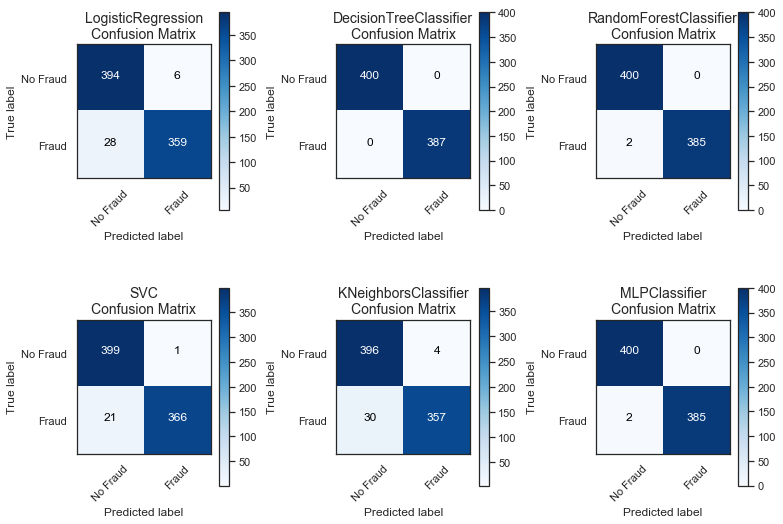

In [69]:
# Plotando matriz de confusão para cada modelo (considerando dados de treino)
i = 1
plt.figure(figsize=(11, 11))
sns.set(style='white', palette='muted', color_codes=True)
labels = ['No Fraud', 'Fraud']

for key, model in classifiers.items(): 
    # Treinando modelo e avaliando score em validação cruzada
    model.fit(X_train_under, y_train_under)
    model_pred = model.predict(X_train_under)
    model_cf_mx = confusion_matrix(y_train_under, model_pred)
    
    # Plotando matriz
    model_name = model.__class__.__name__
    plt.subplot(3, 3, i)
    plot_confusion_matrix(model_cf_mx, labels, title=model_name + '\nConfusion Matrix')
    i += 1
    
plt.tight_layout()
plt.show()

Aqui temos uma visão clara sobre como os modelos se comportam nos dados de treino. Indicadores nítidos de `overfitting` podem ser visualizados nos modelos `DecisionTrees` e `RandomForest` (situação característica dessas estruturas sem nenhuma limitação das árvores), além também do modelo `MLPClassifier`. Vamos repetir essa análise utilizando os dados de teste obtidos no resampling.

#### Teste Under Sampling

In [70]:
# Criando dataframe
model_test_performance_under = create_dataset()
model_test_performance_under

,acc,prec,rec,f1,total_time


In [71]:
# Treinando classificadores (acc, precision, recall e f1_score)
for key, model in classifiers.items():
    t0 = time.time()
    
    # Treinando modelo e predizendo com dados de teste undersampled
    model.fit(X_train_under, y_train_under)
    model_pred = model.predict(X_test_under)
    
    # Avaliando scores
    test_acc_under = accuracy_score(y_test_under, model_pred)
    test_prec_under = precision_score(y_test_under, model_pred)
    test_rec_under = recall_score(y_test_under, model_pred)
    test_f1_under = f1_score(y_test_under, model_pred)
    
    # Retornando parâmetros para comunicação dos resultados
    t1 = time.time()
    delta_time = t1-t0
    model_name = model.__class__.__name__
    
    # Salvando em dataframe
    performances = {}
    performances['acc'] = round(test_acc_under, 4)
    performances['prec'] = round(test_prec_under, 4)
    performances['rec'] = round(test_rec_under, 4)
    performances['f1'] = round(test_f1_under, 4)
    performances['total_time'] = round(delta_time, 3)
    
    model_test_performance_under = model_test_performance_under.append\
(performances, ignore_index=True)

In [72]:
# Visualizando
model_test_performance_under.index = classifiers.keys()
cm = sns.light_palette("green", as_cmap=True)
model_test_performance_under.style.background_gradient(cmap=cm)

,acc,prec,rec,f1,total_time
log_reg,0.9289,0.9691,0.8952,0.9307,0.014
tree_clf,0.9086,0.9223,0.9048,0.9135,0.027
forest_clf,0.9137,0.949,0.8857,0.9163,0.05
svm_clf,0.9036,0.9057,0.9143,0.91,0.046
knn_clf,0.9188,0.9785,0.8667,0.9192,0.031
mlp_clf,0.9239,0.9592,0.8952,0.9261,1.1


Percebemos que o algoritmo `LogisticRegression` apresentou os melhores resultados no geral. Vejamos a matriz de confusão.

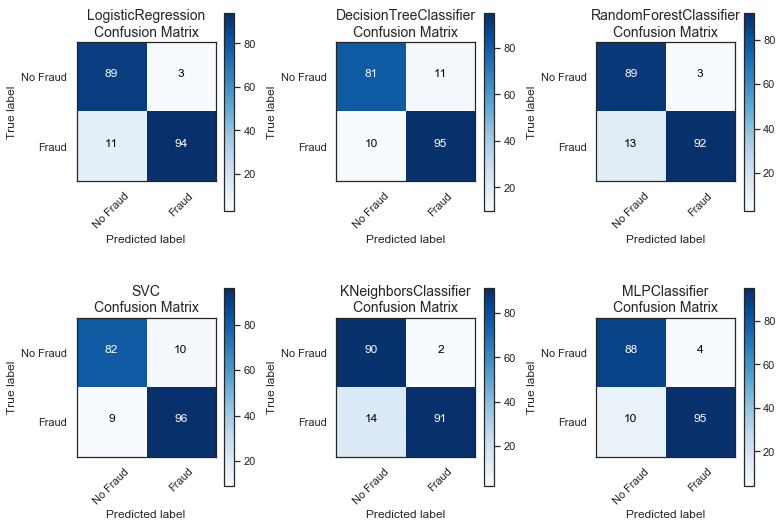

In [73]:
# Plotando matriz de confusão para cada modelo (considerando dados de teste)
i = 1
plt.figure(figsize=(11, 11))
sns.set(style='white', palette='muted', color_codes=True)
labels = ['No Fraud', 'Fraud']

for key, model in classifiers.items(): 
    # Treinando modelo e avaliando score em validação cruzada
    model.fit(X_train_under, y_train_under)
    model_pred = model.predict(X_test_under)
    model_cf_mx = confusion_matrix(y_test_under, model_pred)
    
    # Plotando matriz
    model_name = model.__class__.__name__
    plt.subplot(3, 3, i)
    plot_confusion_matrix(model_cf_mx, labels, title=model_name + '\nConfusion Matrix')
    i += 1
    
plt.tight_layout()
plt.show()

Nosso grande desafio agora é verificar a performance de cada modelo treinado nos dados de teste originais. Vejamos.

#### Teste Original

In [74]:
# Criando dataframe
model_test_performance_original = create_dataset()
model_test_performance_original

,acc,prec,rec,f1,total_time


In [75]:
# Treinando classificadores (acc, precision, recall e f1_score)
for key, model in classifiers.items():
    t0 = time.time()
    
    # Treinando modelo e predizendo com dados de teste undersampled
    model.fit(X_train_under, y_train_under)
    model_pred = model.predict(X_test)
    
    # Avaliando scores
    test_acc_original = accuracy_score(y_test, model_pred)
    test_prec_original = precision_score(y_test, model_pred)
    test_rec_original = recall_score(y_test, model_pred)
    test_f1_original = f1_score(y_test, model_pred)
    
    # Retornando parâmetros para comunicação dos resultados
    t1 = time.time()
    delta_time = t1-t0
    model_name = model.__class__.__name__
    
    # Salvando em dataframe
    performances = {}
    performances['acc'] = round(test_acc_original, 4)
    performances['prec'] = round(test_prec_original, 4)
    performances['rec'] = round(test_rec_original, 4)
    performances['f1'] = round(test_f1_original, 4)
    performances['total_time'] = round(delta_time, 3)
    
    model_test_performance_original = model_test_performance_original.append\
(performances, ignore_index=True)

In [76]:
# Visualizando
model_test_performance_original.index = classifiers.keys()
cm = sns.light_palette("green", as_cmap=True)
model_test_performance_original.style.background_gradient(cmap=cm)

,acc,prec,rec,f1,total_time
log_reg,0.9645,0.0459,0.9238,0.0875,0.088
tree_clf,0.91,0.0195,0.9714,0.0383,0.132
forest_clf,0.9754,0.0674,0.9619,0.126,0.24
svm_clf,0.9387,0.0279,0.9524,0.0542,1.925
knn_clf,0.9779,0.0713,0.9143,0.1322,3.697
mlp_clf,0.954,0.0375,0.9714,0.0723,1.297


De cara, é possível perceber que obtivemos excelentes resultados para `recall`, porém ao preço de péssimos resultados para `precision`. Futuramente, veremos que isto está relacionado ao threshold de cada modelo, tal qual poderá ser visto na curva `Precision x Recall`.

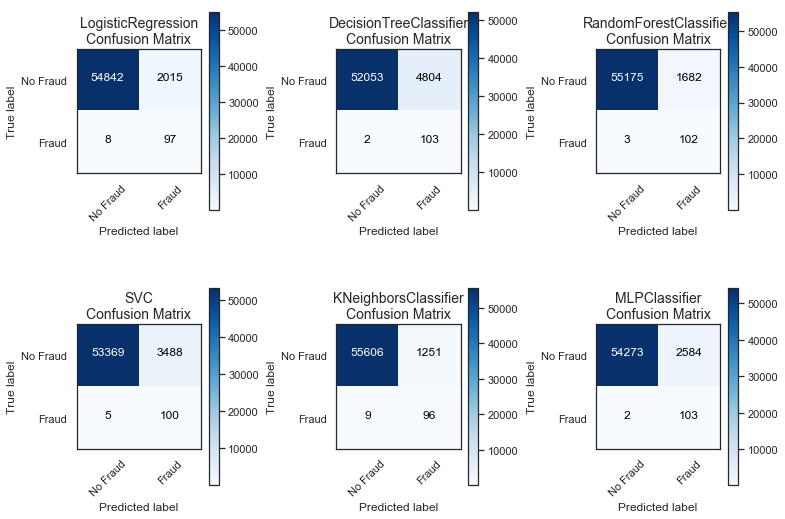

In [77]:
# Plotando matriz de confusão para cada modelo (considerando dados de teste)
i = 1
plt.figure(figsize=(11, 11))
sns.set(style='white', palette='muted', color_codes=True)
labels = ['No Fraud', 'Fraud']

for key, model in classifiers.items(): 
    # Treinando modelo e avaliando score em validação cruzada
    model.fit(X_train_under, y_train_under)
    model_pred = model.predict(X_test)
    model_cf_mx = confusion_matrix(y_test, model_pred)
    
    # Plotando matriz
    model_name = model.__class__.__name__
    plt.subplot(3, 3, i)
    plot_confusion_matrix(model_cf_mx, labels, title=model_name + '\nConfusion Matrix')
    i += 1
    
plt.tight_layout()
plt.show()

Os bons resultados de `recall`, ou seja, o bom índice de classificação de fraudes, deixando passar o mínimo possível, veio a um grande preço de queda de `precision`, ou seja, um considerável aumento nos Falsos Positivos, ou seja, transações normais classificadas como fraudulentas.

Por exemplo, na matriz de confusão do modeo de **Regressão Logística**, é possível identificar que, de 102 fraudes disponíveis, o modelo conseguiu classificar 96 corretamente, deixando passar apenas 6. Entretanto, 2218 transações normais foram classificadas como fraude, o que não é bom.

#### ROC Curve

Vamos comparar a ROC curve de cada um dos modelos, ainda nos dados undersampled.

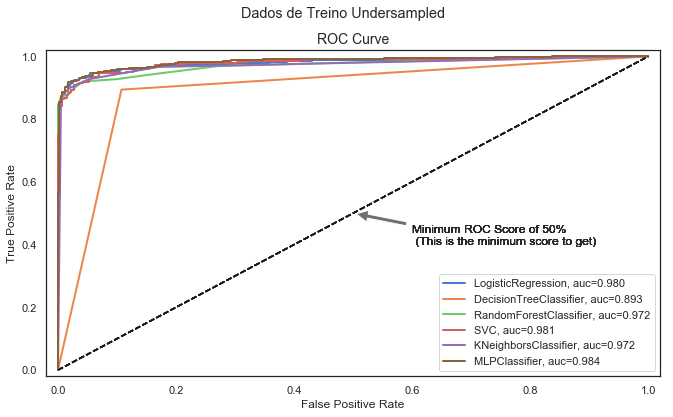

In [128]:
# Plotando curva ROC
plt.figure(figsize=(11, 6))

for key, model in classifiers.items():
    
    # Treinando modelo e predizendo com dados de teste undersampled
    model.fit(X_train_under, y_train_under)

    # Calculando scores e Area Under the Curve
    try:
        y_scores = cross_val_predict(model, X_train_under, y_train_under, cv=5, 
                                     method='decision_function')
    except:
        # Trata-se de uma Árvore de Decisão que não possui o método "decision_function"
        y_probas = cross_val_predict(model, X_train_under, y_train_under, cv=5, 
                                     method='predict_proba')
        y_scores_tree = y_probas[:, 1]
        y_scores = y_scores_tree
        
    # Calculando ROC Curve
    model_name = model.__class__.__name__
    fpr, tpr, thresholds = roc_curve(y_train_under, y_scores)
    auc = roc_auc_score(y_train_under, y_scores)
    plot_roc_curve(fpr, tpr, y_train_under, y_scores, auc, label=model_name)
    plt.suptitle('Dados de Treino Undersampled')

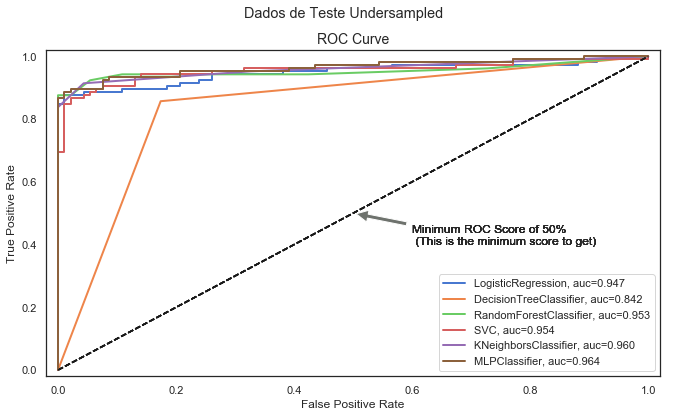

In [129]:
# Plotando curva ROC
plt.figure(figsize=(11, 6))

for key, model in classifiers.items():
    
    # Treinando modelo e predizendo com dados de teste undersampled
    model.fit(X_train_under, y_train_under)

    # Calculando scores e Area Under the Curve
    try:
        y_scores = cross_val_predict(model, X_test_under, y_test_under, cv=5, 
                                     method='decision_function')
    except:
        # Trata-se de uma Árvore de Decisão que não possui o método "decision_function"
        y_probas = cross_val_predict(model, X_test_under, y_test_under, cv=5, 
                                     method='predict_proba')
        y_scores_tree = y_probas[:, 1]
        y_scores = y_scores_tree
        
    # Calculando ROC Curve
    model_name = model.__class__.__name__
    fpr, tpr, thresholds = roc_curve(y_test_under, y_scores)
    auc = roc_auc_score(y_test_under, y_scores)
    plot_roc_curve(fpr, tpr, y_test_under, y_scores, auc, label=model_name)
    plt.suptitle('Dados de Teste Undersampled')

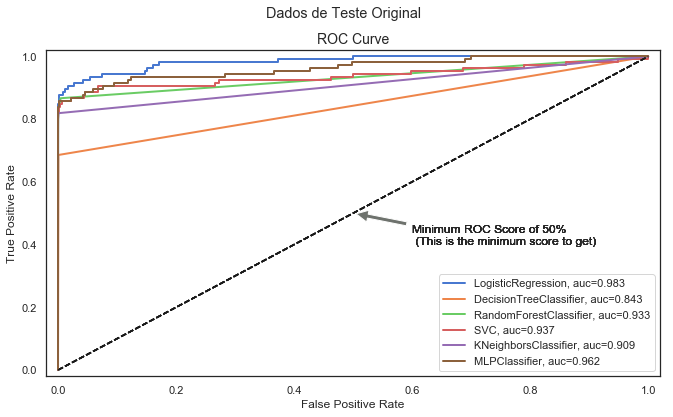

In [131]:
# Plotando curva ROC
plt.figure(figsize=(11, 6))

for key, model in classifiers.items():
    
    # Treinando modelo e predizendo com dados de teste undersampled
    model.fit(X_train_under, y_train_under)

    # Calculando scores e Area Under the Curve
    try:
        y_scores = cross_val_predict(model, X_test, y_test, cv=5, 
                                     method='decision_function')
    except:
        # Trata-se de uma Árvore de Decisão que não possui o método "decision_function"
        y_probas = cross_val_predict(model, X_test, y_test, cv=5, 
                                     method='predict_proba')
        y_scores_tree = y_probas[:, 1]
        y_scores = y_scores_tree
        
    # Calculando ROC Curve
    model_name = model.__class__.__name__
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plot_roc_curve(fpr, tpr, y_test, y_scores, auc, label=model_name)
    plt.suptitle('Dados de Teste Original')

#### Precision x Recall

Um ponto fundamental da análise de modelos desbalanceados é a troca entre Precision e Recall.

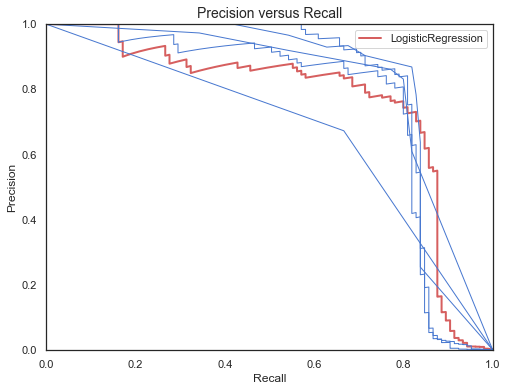

In [136]:
# Treinando classificadores
plt.figure(figsize=(8, 6))

for key, model in classifiers.items():
    
    # Treinando modelo e predizendo com dados de teste undersampled
    model.fit(X_train_under, y_train_under)

    # Calculando scores e Area Under the Curve
    try:
        y_scores = cross_val_predict(model, X_test, y_test, cv=5, 
                                     method='decision_function')
    except:
        # Trata-se de uma Árvore de Decisão que não possui o método "decision_function"
        y_probas = cross_val_predict(model, X_test, y_test, cv=5, 
                                     method='predict_proba')
        y_scores_tree = y_probas[:, 1]
        y_scores = y_scores_tree
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
        
    # Calculando Precision x Recall curve
    model_name = model.__class__.__name__
    if model_name == 'LogisticRegression':
        plot_precision_vs_recall(precisions, recalls, label=model_name)
    else:
        plot_precision_vs_recall(precisions, recalls)
    plt.suptitle('Dados de Teste Original')

## Regressão Logística

Para continuar nossa análise, vamos escolher um único modelo, neste primeiro momento, para investigar as melhorias necessárias de modo a transformar nosso modelo com as melhores configurações possíveis. Por critérios de facilidade e performance, vamos analisar mais a fundo o modelo de **Regressão Logística**.

### Comparação Original x Undersampled

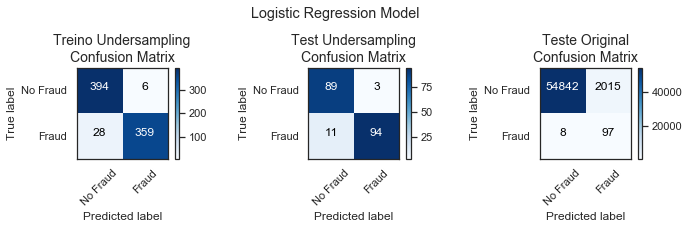

In [158]:
# Plotando matriz de confusão para cada modelo (considerando dados de treino)
i = 1
plt.figure(figsize=(10, 3))
sns.set(style='white', palette='muted', color_codes=True)
labels = ['No Fraud', 'Fraud']

# Treinando modelo
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

# Predições
train_under_pred = log_reg.predict(X_train_under)
test_under_pred = log_reg.predict(X_test_under)
test_original_pred = log_reg.predict(X_test)
predictions = {
    '1': [y_train_under, train_under_pred],
    '2': [y_test_under, test_under_pred],
    '3': [y_test, test_original_pred]
}
titles = ['Treino Undersampling', 'Test Undersampling', 'Teste Original']

for y_set, pred in predictions.values():
    model_cf_mx = confusion_matrix(y_set, pred)
    title = titles[i-1]
    plt.subplot(1, 3, i)
    plot_confusion_matrix(model_cf_mx, labels, title=title + '\nConfusion Matrix')
    i += 1
    
plt.tight_layout()
plt.suptitle('Logistic Regression Model')
plt.subplots_adjust(top=0.70)
plt.show()

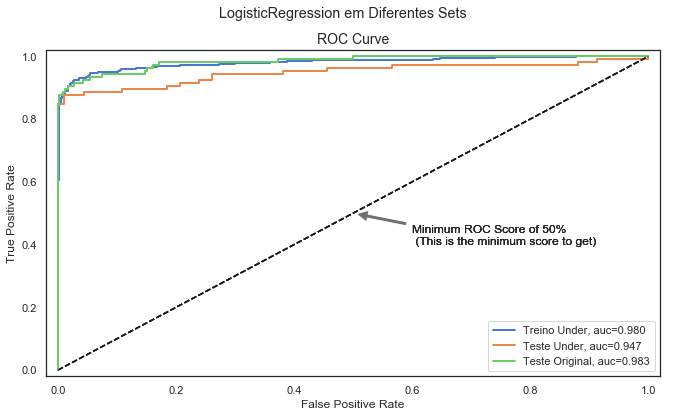

In [168]:
# Preparando análise
roc_analysis = {
    '1': [X_train_under, y_train_under],
    '2': [X_test_under, y_test_under],
    '3': [X_test, y_test]
}
labels = ['Treino Under', 'Teste Under', 'Teste Original']
i = 0
plt.figure(figsize=(11, 6))

# ROC curve
for X_set, y_set in roc_analysis.values(): 
    y_scores = cross_val_predict(log_reg, X_set, y_set, cv=5, 
                                         method='decision_function')
    # Calculando ROC Curve
    fpr, tpr, thresholds = roc_curve(y_set, y_scores)
    auc = roc_auc_score(y_set, y_scores)
    plot_roc_curve(fpr, tpr, y_test, y_scores, auc, label=labels[i])
    plt.suptitle('LogisticRegression em Diferentes Sets')
    i += 1
plt.show()

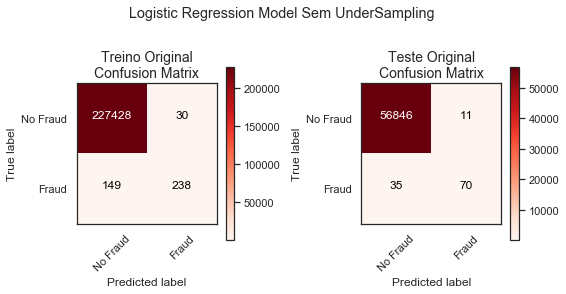

In [175]:
# Vamos treinar o modelo em sua versão original (sem undersampling)
log_reg_original = LogisticRegression()
log_reg_original.fit(X_train, y_train)

# Analisando nos dados de treino e teste
y_pred_treino = log_reg_original.predict(X_train)
y_pred_teste = log_reg_original.predict(X_test)

# Agrupando predições
original_predictions = {
    '1': [y_train, y_pred_treino],
    '2': [y_test, y_pred_teste],
}

# Configurando plotagem
labels = ['No Fraud', 'Fraud']
titles = ['Treino Original', 'Teste Original']
i = 1
plt.figure(figsize=(8, 4))
sns.set(style='white', palette='muted', color_codes=True)
for y_set, pred in original_predictions.values():
    model_cf_mx = confusion_matrix(y_set, pred)
    title = titles[i-1]
    plt.subplot(1, 2, i)
    plot_confusion_matrix(model_cf_mx, labels, title=title + '\nConfusion Matrix',
                         cmap=plt.cm.Reds)
    i += 1
    
plt.tight_layout()
plt.suptitle('Logistic Regression Model Sem UnderSampling')
plt.subplots_adjust(top=0.77)
plt.show()

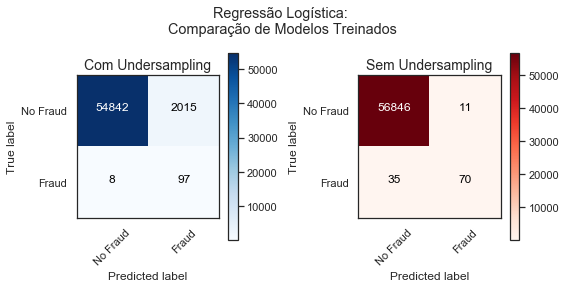

In [187]:
# Comparando matrizes de confusão COM e SEM underesampling nos dados de teste originais

labels = ['No Fraud', 'Fraud']
titles = ['Com Undersampling', 'Sem Undersampling']

# Configurando plotagem
plt.figure(figsize=(8, 4))
sns.set(style='white', palette='muted', color_codes=True)

# Realizando predições
under_pred = log_reg.predict(X_test)
original_pred = log_reg_original.predict(X_test)
cf_mx_sem_under = confusion_matrix(y_test, original_pred)
cf_mx_com_under = confusion_matrix(y_test, under_pred)

# Plotando dados
plt.subplot(1, 2, 1)
plot_confusion_matrix(cf_mx_com_under, labels, title=titles[0])
plt.subplot(1, 2, 2)
plot_confusion_matrix(cf_mx_sem_under, labels, title=titles[1],
                      cmap=plt.cm.Reds)

# Configurações finais
plt.tight_layout()
plt.suptitle('Regressão Logística: \nComparação de Modelos Treinados')
plt.subplots_adjust(top=0.82)
plt.show()

In [190]:
# Dicionário de classificadores
logistic_regs = {
    'log_reg': [X_train_under, y_train_under, log_reg],
    'log_reg_original': [X_train, y_train, log_reg_original],
}

In [200]:
# Criando dataframe para análise
log_reg_comparison = create_dataset()
log_reg_comparison

,acc,prec,rec,f1,total_time


In [201]:
# Treinando classificadores (acc, precision, recall e f1_score)
for train_set, y_set, model in logistic_regs.values():
    # O tempo de treinamento e predição também será avaliado
    t0 = time.time()
    model.fit(train_set, y_set) # Treino em sets com e sem undersampling
    pred = model.predict(X_test) # Original X_test
    
    # Avaliando scores
    test_acc_original = accuracy_score(y_test, pred)
    test_prec_original = precision_score(y_test, pred)
    test_rec_original = recall_score(y_test, pred)
    test_f1_original = f1_score(y_test, pred)
    
    # Retornando parâmetros para comunicação dos resultados
    t1 = time.time()
    delta_time = t1-t0
    model_name = model.__class__.__name__
    
    # Salvando em dataframe
    performances = {}
    performances['acc'] = round(test_acc_original, 4)
    performances['prec'] = round(test_prec_original, 4)
    performances['rec'] = round(test_rec_original, 4)
    performances['f1'] = round(test_f1_original, 4)
    performances['total_time'] = round(delta_time, 3)
    
    log_reg_comparison = log_reg_comparison.append\
(performances, ignore_index=True)

In [225]:
# Visualizando
log_reg_comparison.index = ['undersampled', 'original']
cm = sns.light_palette("green", as_cmap=True)
log_reg_comparison.style.background_gradient(cmap=cm)

,acc,prec,rec,f1,total_time
undersampled,0.9645,0.0459,0.9238,0.0875,0.069
original,0.9992,0.8642,0.6667,0.7527,6.477


Confirmamos o que já estava previsto:

* Com o procedimento de **undersampling**, conseguimos um `recall` elevado, ou seja, identificamos mais fraudes, porém a custo de uma extrema queda em `precision`, ou seja, muitas transações normais foram classificadas como fraudulentas.
* O tempo de processamento entre os procedimentos também é algo para se levar em consideração, dado que em um treinamento original, temos uma grande quantidade de dados não balanceada, o que custou um grande processamento ao modelo.
* Mesmo com esse grande número de **Falsos Positivos**, existe uma forma de balancear as métricas de `precision` e `recall` através da curva _Precision versus Recall_.

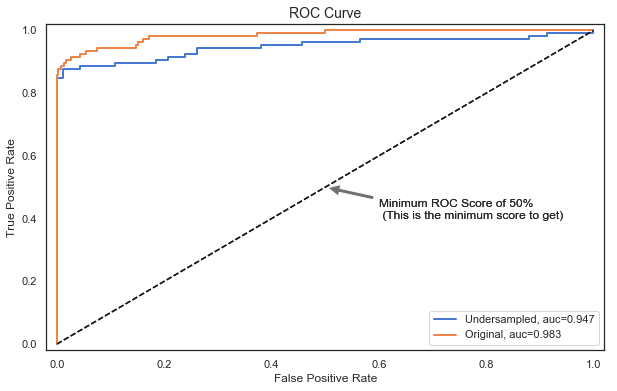

In [232]:
# Preparando análise undersampled
plt.figure(figsize=(10, 6))
y_scores_under = cross_val_predict(log_reg, X_test_under, y_test_under, cv=5,
                                  method='decision_function')
fpr, tpr, thresholds = roc_curve(y_test_under, y_scores_under)
auc = roc_auc_score(y_test_under, y_scores_under)
plot_roc_curve(fpr, tpr, y_test_under, y_scores_under, auc, label='Undersampled')

# Preparando análise original
y_scores = cross_val_predict(log_reg_original, X_test, y_test, cv=5,
                                  method='decision_function')
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)
plot_roc_curve(fpr, tpr, y_test, y_scores, auc, label='Original')

plt.show()

### Precision x Recall

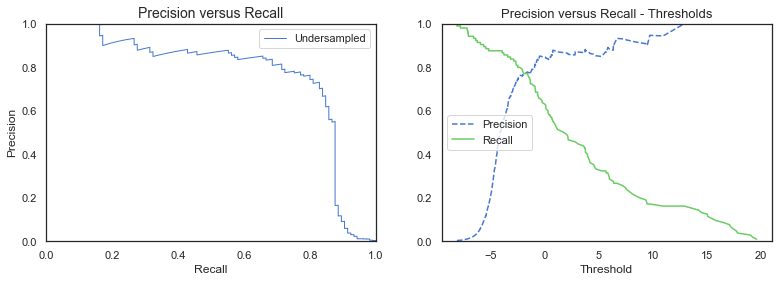

In [244]:
# Verificando curva
plt.figure(figsize=(13, 4))

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_under)
plt.subplot(1, 2, 1)
plot_precision_vs_recall(precisions, recalls, label='Undersampled', color='b')
plt.subplot(1, 2, 2)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Vamos em busca do melhor threhsold.

In [292]:
# Criando dataframe
threshold_metrics = create_dataset()
threshold_metrics['auc']=''
threshold_metrics.drop(['total_time'], inplace=True, axis=1)
threshold_metrics

,acc,prec,rec,f1,auc


In [293]:
thresholds = np.linspace(-1, 2, 20)
for t in thresholds:
    y_best_recall = np.where(y_scores_under > t, 1, 0)
    acc = accuracy_score(y_test, y_best_recall)
    recall = recall_score(y_test, y_best_recall)
    precision = precision_score(y_test, y_best_recall)
    f1 = f1_score(y_test, y_best_recall)
    auc = roc_auc_score(y_test, y_best_recall)
    
    # Salvando em dataframe
    performances = {}
    performances['acc'] = round(acc, 4)
    performances['prec'] = round(precision, 4)
    performances['rec'] = round(recall, 4)
    performances['f1'] = round(f1, 4)
    performances['auc'] = round(auc, 4)
    
    threshold_metrics = threshold_metrics.append\
(performances, ignore_index=True)

In [294]:
# Visualizando
threshold_index = [round(t, 2) for t in thresholds]
threshold_metrics.index = threshold_index
cm = sns.light_palette("cornflowerblue", as_cmap=True)
threshold_metrics.style.background_gradient(cmap=cm)

,acc,prec,rec,f1,auc
-1.0,0.9991,0.7143,0.7895,0.75,0.857
-0.84,0.9991,0.6952,0.8111,0.7487,0.8475
-0.68,0.9992,0.6857,0.8372,0.7539,0.8427
-0.53,0.9991,0.6571,0.8415,0.738,0.8285
-0.37,0.9991,0.6476,0.85,0.7351,0.8237
-0.21,0.9991,0.6381,0.8481,0.7283,0.8189
-0.05,0.9991,0.6286,0.8462,0.7213,0.8142
0.11,0.9991,0.6286,0.8462,0.7213,0.8142
0.26,0.9991,0.6,0.84,0.7,0.7999
0.42,0.999,0.581,0.8356,0.6854,0.7904
